# Libraries used in this notebook

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing data set from kaggle

currently using downloaded version until import from website works

In [30]:
file_path = r'/workspaces/ACT-coursework-2/star_classification.csv'
df_sdss = pd.read_csv(file_path)

# ML Classifier

We will be using a Random Forest classifier to classify wether a data point is a Star, Galaxy or quasar 'QSO'

In [31]:
df_sdss['class'] = LabelEncoder().fit_transform(df_sdss['class'])
X = df_sdss.loc[ : , df_sdss.columns != 'class'] #uses all columns except class column
y = df_sdss['class'] # uses only class column
X_train_sdss, X_test_sdss, y_train_sdss, y_test_sdss = train_test_split(X, y, test_size = 0.7, random_state = 42)

In [32]:
rf_class = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_class.fit(X_train_sdss, y_train_sdss)
y_pred = rf_class.predict(X_test_sdss)

accuracy = accuracy_score(y_test_sdss, y_pred)
mse = mean_squared_error(y_test_sdss, y_pred)
rmse = np.sqrt(mse)
print('Accuracy: ', accuracy*100,'%')
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

Accuracy:  97.56714285714285 %
Mean Squared Error:  0.035257142857142855
Root Mean Squared Error:  0.18776885486454578


# Model parameters

In [33]:
rf_params = rf_class.get_params()
rf_params_df = pd.DataFrame([rf_params]).T
display(rf_params_df)

,0
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


# Feature importance for Random Forest

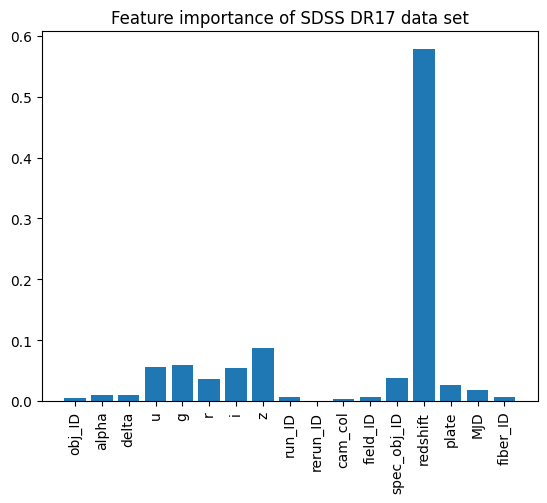

In [34]:
plt.title('Feature importance of SDSS DR17 data set')
plt.bar(rf_class.feature_names_in_, rf_class.feature_importances_)
plt.xticks(rotation=90)
plt.show()